(2000, 4096)


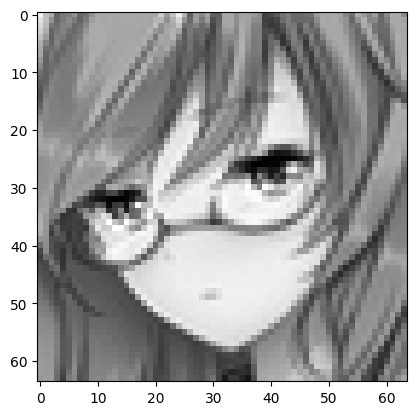

In [2]:
import numpy as np
import matplotlib.pyplot as plt

faces = np.loadtxt("anime_girls_2000x4096.csv", delimiter=',')
print(faces.shape)
plt.imshow(faces[0].reshape(64, 64), cmap='gray')

In [3]:
faces_centered = faces - faces.mean(axis=0)
faces_covariance = faces.shape[0]**-1 * faces_centered.T @ faces_centered

In [4]:
w, v = np.linalg.eigh(faces_covariance)

In [14]:
# save top 30 eigenfaces to csv
np.savetxt("eigenfaces.csv", v[:, ::-1][:, :30].T, delimiter=',')

In [15]:
# imshow eigenfaces
eigenfaces = np.loadtxt("eigenfaces.csv", delimiter=',')
eigenfaces.shape

(30, 4096)

In [31]:
(eigenfaces - eigenfaces.min(axis=1, keepdims=True)).shape

(30, 4096)

In [34]:
eigenfaces = (eigenfaces - eigenfaces.min(axis=1, keepdims=True)) / (eigenfaces.max(axis=1, keepdims=True) - eigenfaces.min(axis=1, keepdims=True)) * 255
eigenfaces = eigenfaces.astype(np.uint8)
print(eigenfaces[0].min(), eigenfaces[0].max())

np.savetxt("eigenfaces-norm.csv", eigenfaces, delimiter=',', fmt='%i')

0 255


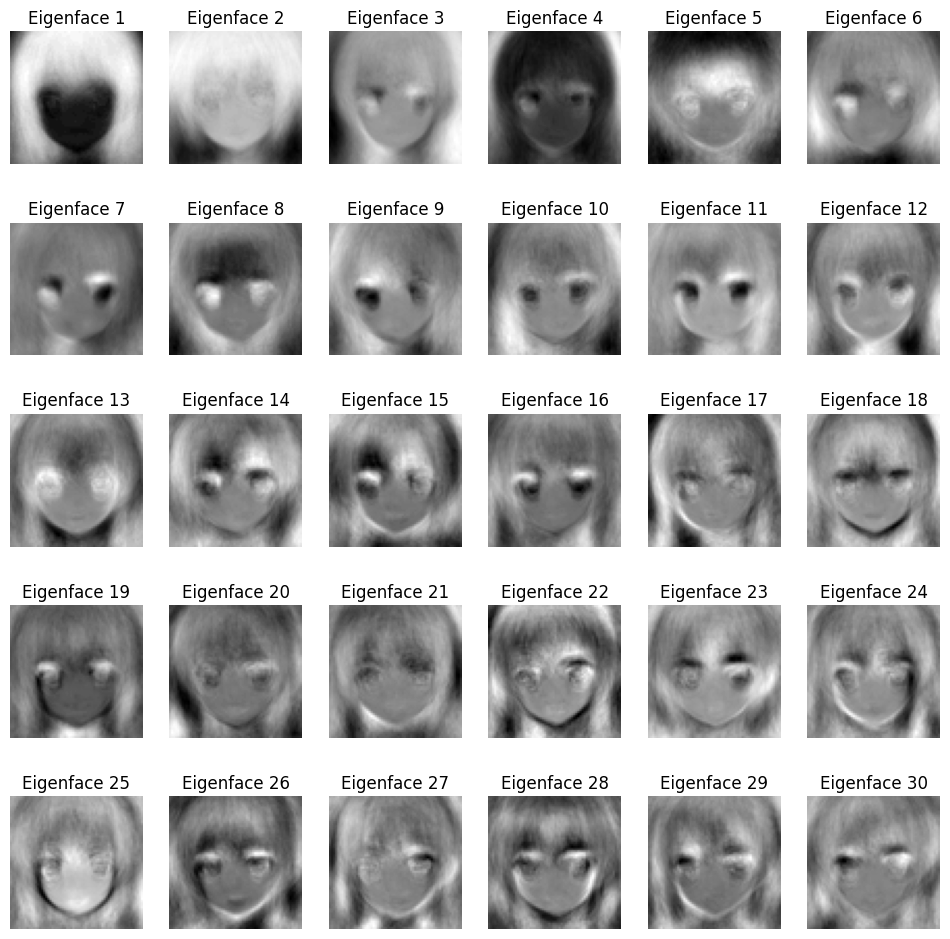

In [49]:
fig, axes = plt.subplots(5, 6, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')

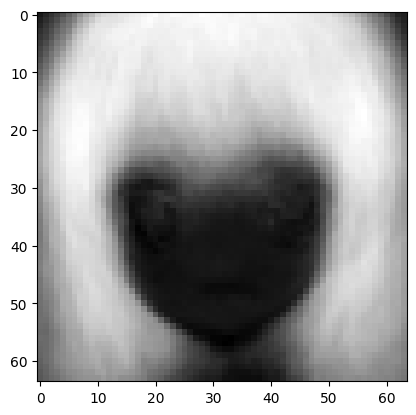

In [5]:
plt.imshow(v[:, -1].reshape((64, 64)), cmap="gray")

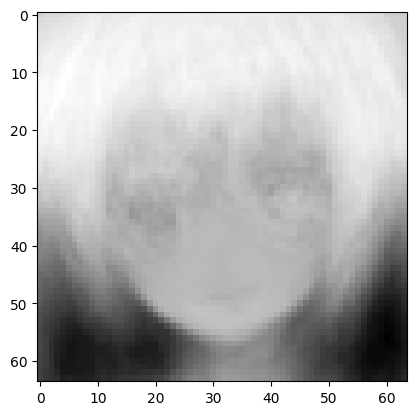

In [6]:
plt.imshow(v[:, -2].reshape((64, 64)), cmap="gray")

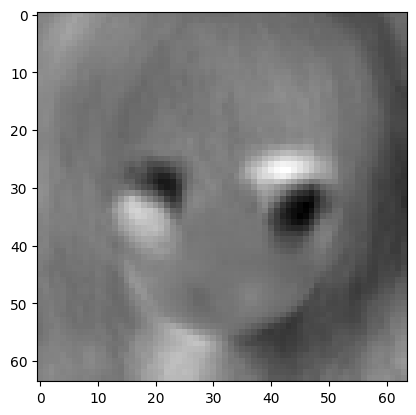

In [17]:
plt.imshow(v[:, -7].reshape((64, 64)), cmap="gray")

In [8]:
v[:, -2:].shape, faces_centered.shape

((4096, 2), (400, 4096))

In [ ]:
faces_centered 

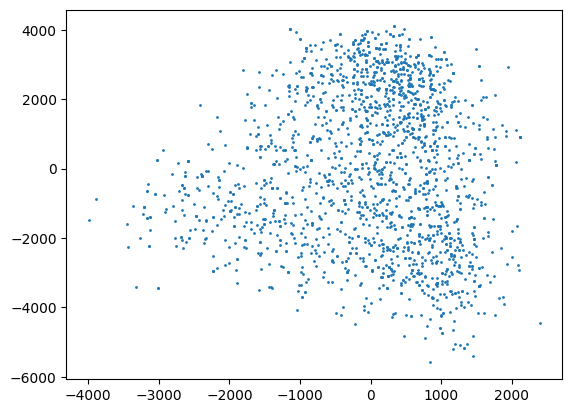

In [48]:
# project face data onto the two top eigenvectors
faces_projected = faces_centered @ v[:, [-2, -1]]
plt.scatter(faces_projected[:, 0], faces_projected[:, 1], s=1)